In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from lynnesim import LynneSim 
help(LynneSim())

Assuming a total number of visits 2600000 and that we will use 0.900000 of them:
The number of visits available for use is 2340000 (2.34M)
Help on LynneSim in module lynnesim object:

class LynneSim(builtins.object)
 |  Worker class for estimating approximate LSST number of visits, depth etc in a mock proposal-based LSST
 |  survey campaign.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, totalNvis=2600000, percentTotal=0.9)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  calculate_metrics(self)
 |      Compute depth per field, per filter.
 |      
 |      Notes
 |      =====
 |      Currently we assume non-overlapping regions...
 |  
 |  define_survey_region(self, name, limits=None, NvisitsPerField=None, fractions=None)
 |      Extract a subset of the fields, within the given spatial limits.
 |      Note that various regions can overlap!
 |      
 |      Parameters
 |      ==========
 |      name: string
 |          The name of the survey region 

## Configuring the Observing Strategy



Assuming a total number of visits 2600000 and that we will use 0.930000 of them:
The number of visits available for use is 2418000 (2.42M)
Defined survey region WFD
  with 2445 fields in the selected footprint
  (will decide total number of visits per field later)
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
WFD actually has 2272 fields after removing GP
Defined survey region GalacticPlane
  with 4976 fields in the selected footprint
  with 90 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
GP actually has 218 fields
Defined survey region NES
  with 529 fields in the selected footprint
  with 255 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.166666666666

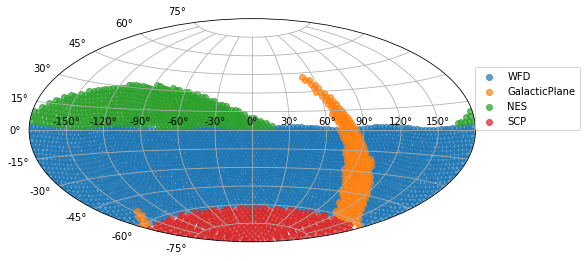

In [52]:
# Old footprint
Lynne = LynneSim(totalNvis=2600000, percentTotal=0.93)
Lynne.define_survey_region('WFD', NvisitsPerField=None, limits={'dec':[-62.,2.5]})
# Carve out the GP
Lynne.regions['WFD'] = Lynne.regions['WFD'].query('abs(gb) > (10 - (10 * abs(gl))/90)')
print("WFD actually has %d fields after removing GP" % (len(Lynne.regions['WFD'])))
# Define the GP
Lynne.define_survey_region('GalacticPlane', NvisitsPerField=90, limits={'dec':[-62., 90]})
Lynne.regions['GalacticPlane'] = Lynne.regions['GalacticPlane'].query('abs(gb) < (10 - (10 * abs(gl))/90)')
print("GP actually has %d fields" % len(Lynne.regions['GalacticPlane']))
Lynne.define_survey_region('NES', NvisitsPerField=255,
                          limits={'dec':[2.51, 90], 'eb':[-20, 10]})
Lynne.define_survey_region('SCP', NvisitsPerField=90,
                          limits={'dec':[-90, -62.05]})
fig = Lynne.plot_sky_map()

Assuming a total number of visits 2600000 and that we will use 0.930000 of them:
The number of visits available for use is 2418000 (2.42M)
Defined survey region WFD
  with 2286 fields in the selected footprint
  with 825 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined survey region GalacticPlaneCenter
  with 435 fields in the selected footprint
  with 825 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined survey region NES
  with 293 fields in the selected footprint
  with 255 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined su

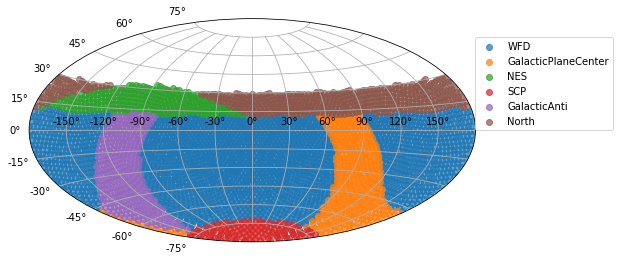

In [66]:
# New footprint
Lynne = LynneSim(totalNvis=2600000, percentTotal=0.93)
Lynne.define_survey_region('WFD', NvisitsPerField=825, limits={'dec':[-72.25,12.25], 'gb':[15.01, -15.01]})
Lynne.define_survey_region('GalacticPlaneCenter', NvisitsPerField=825,
                           limits={'gb':[-15.0, 15.0], 'gl':[-70.0, 90.0],'dec':[-72.25, 12.25]})
Lynne.define_survey_region('NES', NvisitsPerField=255,
                          limits={'dec':[12.26, 90], 'eb':[-15, 10]})
Lynne.define_survey_region('SCP', NvisitsPerField=200,
                          limits={'dec':[-90, -72.5]})
Lynne.define_survey_region('GalacticAnti', 
                          limits={'gb':[-15.0, 15.0], 'gl':[90.0, -70.0], 'dec':[-72.25, 12.25]})
Lynne.define_survey_region('North', NvisitsPerField=60,
                          limits={'dec':[12.26, 30], 'eb':[10.2, 90]})
fig = Lynne.plot_sky_map()

In [67]:
# %load -n LynneSim.define_survey_region

## Emulating an OpSim Run

In [68]:
Lynne.distribute_visits()

Assigned 1885950 visits to WFD (825 visits/field * 2286 fields)
Assigned 358875 visits to GalacticPlaneCenter (825 visits/field * 435 fields)
Assigned 74715 visits to NES (255 visits/field * 293 fields)
Assigned 25200 visits to SCP (200 visits/field * 126 fields)
Assigned 29760 visits to North (60 visits/field * 496 fields)
Assigned 2374500 visits based on NvisitsPerField values to each of ['WFD', 'GalacticPlaneCenter', 'NES', 'SCP', 'North']
Assigned 43276 visits based on even split between 349 fields in regions ['GalacticAnti'] (124 per field)
This leaves about 224 visits out of candidate 2418000 remaining.
 (or that these surveys required 0.93 of all the original visits.


In [69]:
Lynne.NvisitsPerField

{'WFD': 825,
 'GalacticPlaneCenter': 825,
 'NES': 255,
 'SCP': 200,
 'North': 60,
 'GalacticAnti': 124}

In [55]:
# %load -n LynneSim.distribute_visits

## Emulating a MAF Analysis

In [70]:
Lynne.calculate_metrics()

In [71]:
# %load -n LynneSim.calculate_metrics

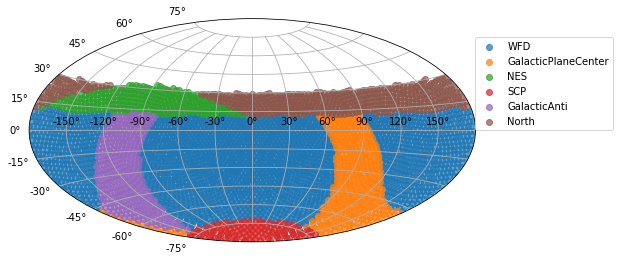

In [72]:
fig = Lynne.plot_sky_map()

WFD
GalacticPlaneCenter
NES
SCP
GalacticAnti
North


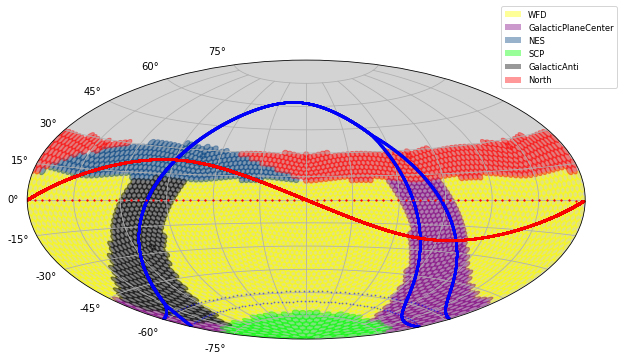

In [73]:
fig = Lynne.fancy_plot()

Defined survey region _all_nvisits
  with 5292 fields in the selected footprint
  (will decide total number of visits per field later)
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
WFD
GalacticPlaneCenter
NES
SCP
GalacticAnti
North


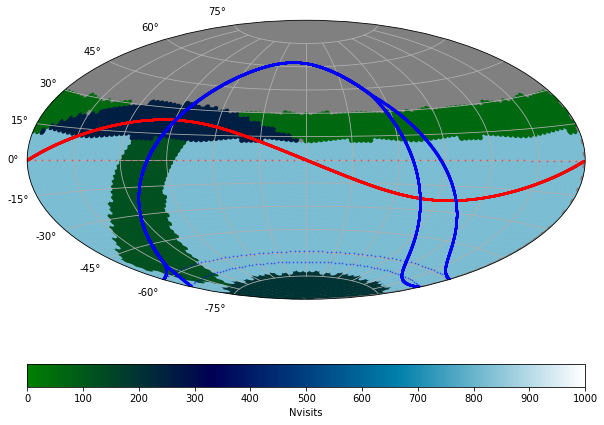

In [74]:
fig = Lynne.fancy_plot_Nvisits(cmap='ocean')

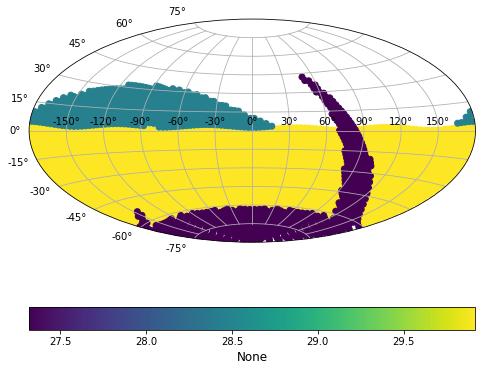

In [61]:
fig = Lynne.plot_sky_map(metric='depth_r')